## Analyze carbon source data

This notebook analyzes the carbon source data collected on 07.09.2017

In [1]:
#Import packages
import numpy as np 
import os
import tifffile as tiff
from skimage.io import imread
from skimage.measure import label, regionprops
import scipy
import matplotlib.pyplot as plt
import cPickle as pickle
from SLIP_functions import analyze_well, analyze_plate, segment_SLIP, plot_slip_well
from SLIP_functions import plot_slip_joint_plot, fit_kde, compute_p_values
import seaborn as sns
import pandas as pd

sns.set_context('notebook', font_scale = 1.1)
sns.set_style('white')
sns.set_style('ticks')

#Activate matplotlib inline
%matplotlib inline

#Define root directory path
root_direc = '/home/vanvalen/Data/keio_screen/07.09.2017/carbon_source/'

#Define directory path to infection data (all positions)
data_direc = os.path.join(root_direc, 'data')

#Define directory path to control data (all positions)
control_direc = os.path.join(root_direc, 'data')

#Define directory path to where you want to store neural net outputs. 
#mask directories must exist at run time!
mask_direc = os.path.join(root_direc, 'masks')
control_mask_direc = os.path.join(root_direc,'control_masks')

tifffile.py:156: UserWarning: failed to import the optional _tifffile C extension module.
Loading of some compressed images will be slow.
Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "failed to import the optional _tifffile C extension module.\n"
Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [2]:
#Define which wells were used
row_control = ['A']
row_data = ['B','D','E','G','H']
col_control = [1,2,3,4,5,6,7,8,9,10,11,12]
col_data = [1,2,3,4,5,6,7,8,9,10,11,12]

In [3]:
#Segment the control wells
segment_SLIP(control_direc, control_mask_direc, alphabet = row_control, columns= col_control)

['A'] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Segmenting Position A1


cnn_functions.py:255: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  pooled_array +=[pool_2d(input_image[:, :, offset_x::stride, offset_y::stride], pool_size, st = (1,1), mode = mode, padding = (0,0), ignore_border = True)]
cnn_functions.py:255: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  pooled_array +=[pool_2d(input_image[:, :, offset_x::stride, offset_y::stride], pool_size, st = (1,1), mode = mode, padding = (0,0), ignore_border = True)]


Segmenting Position A2
Segmenting Position A3
Segmenting Position A4
Segmenting Position A5
Segmenting Position A6
Segmenting Position A7
Segmenting Position A8
Segmenting Position A9
Segmenting Position A10
Segmenting Position A11
Segmenting Position A12


In [4]:
#Segment the infected wells
segment_SLIP(data_direc, mask_direc, alphabet = row_data, columns= col_data)

['B', 'D', 'E', 'G', 'H'] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Segmenting Position B1
Segmenting Position B2
Segmenting Position B3
Segmenting Position B4
Segmenting Position B5
Segmenting Position B6
Segmenting Position B7
Segmenting Position B8
Segmenting Position B9
Segmenting Position B10
Segmenting Position B11
Segmenting Position B12
Segmenting Position D1
Segmenting Position D2
Segmenting Position D3
Segmenting Position D4
Segmenting Position D5
Segmenting Position D6
Segmenting Position D7
Segmenting Position D8
Segmenting Position D9
Segmenting Position D10
Segmenting Position D11
Segmenting Position D12
Segmenting Position E1
Segmenting Position E2
Segmenting Position E3
Segmenting Position E4
Segmenting Position E5
Segmenting Position E6
Segmenting Position E7
Segmenting Position E8
Segmenting Position E9
Segmenting Position E10
Segmenting Position E11
Segmenting Position E12
Segmenting Position G1
Segmenting Position G2
Segmenting Position G3
Segmenting Position G4
Segme

In [6]:
# Quantify the data from the control wells
mean_FITC_control, mean_cherry_control = analyze_plate(control_direc, control_mask_direc, pos_list = range(9), row_names = row_control, col_names = col_control)
mean_FITC_control_name = os.path.join(root_direc, 'mean_FITC_control.pkl')
mean_cherry_control_name = os.path.join(root_direc, 'mean_cherry_control.pkl')
pickle.dump(mean_FITC_control, open(mean_FITC_control_name, 'wb'))
pickle.dump(mean_cherry_control, open(mean_cherry_control_name, 'wb'))

Processing well A1
Processing well A2
Processing well A3
Processing well A4
Processing well A5
Processing well A6
Processing well A7
Processing well A8
Processing well A9
Processing well A10
Processing well A11
Processing well A12


In [7]:
# Quantify the data from the infection wells
mean_FITC, mean_cherry = analyze_plate(data_direc, mask_direc, pos_list = range(9), row_names = row_data, col_names = col_data)
mean_FITC_name = os.path.join(root_direc, 'mean_FITC.pkl')
mean_cherry_name = os.path.join(root_direc, 'mean_cherry.pkl')
pickle.dump(mean_FITC, open(mean_FITC_name, 'wb'))
pickle.dump(mean_cherry, open(mean_cherry_name, 'wb'))

Processing well B1
Processing well B2
Processing well B3
Processing well B4
Processing well B5
Processing well B6
Processing well B7
Processing well B8
Processing well B9
Processing well B10
Processing well B11
Processing well B12
Processing well D1
Processing well D2
Processing well D3
Processing well D4
Processing well D5
Processing well D6
Processing well D7
Processing well D8
Processing well D9
Processing well D10
Processing well D11
Processing well D12
Processing well E1
Processing well E2
Processing well E3
Processing well E4
Processing well E5
Processing well E6
Processing well E7
Processing well E8
Processing well E9
Processing well E10
Processing well E11
Processing well E12
Processing well G1
Processing well G2
Processing well G3
Processing well G4
Processing well G5
Processing well G6
Processing well G7
Processing well G8
Processing well G9
Processing well G10
Processing well G11
Processing well G12
Processing well H1
Processing well H2
Processing well H3
Processing well H4


In [3]:
#Load saved data
mean_FITC_name = os.path.join(root_direc, 'mean_FITC.pkl')
mean_cherry_name = os.path.join(root_direc, 'mean_cherry.pkl')
mean_FITC = pickle.load(open(mean_FITC_name, 'rb'))
mean_cherry = pickle.load(open(mean_cherry_name, 'rb'))

mean_FITC_control_name = os.path.join(root_direc, 'mean_FITC_control.pkl')
mean_cherry_control_name = os.path.join(root_direc, 'mean_cherry_control.pkl')
mean_FITC_control = pickle.load(open(mean_FITC_control_name, 'rb'))
mean_cherry_control = pickle.load(open(mean_cherry_control_name, 'rb'))

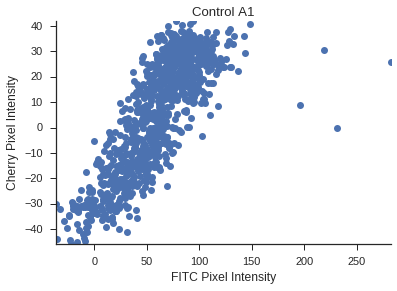

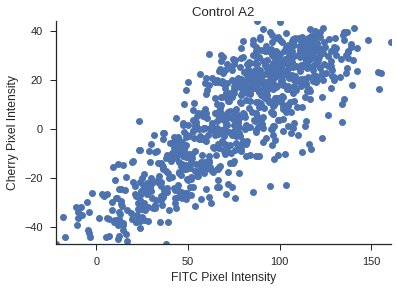

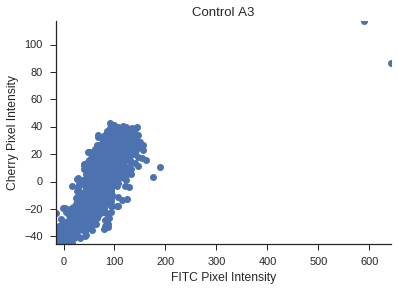

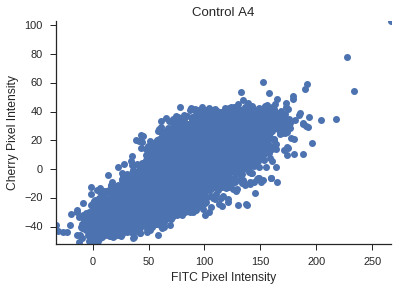

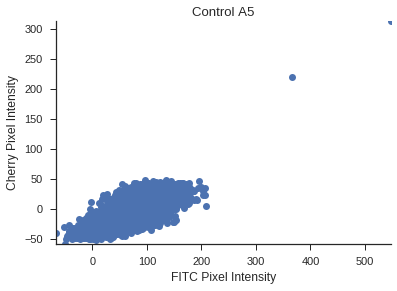

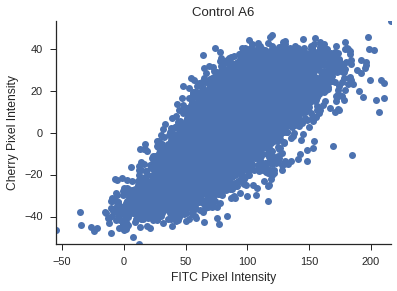

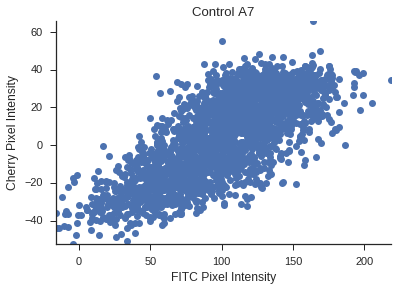

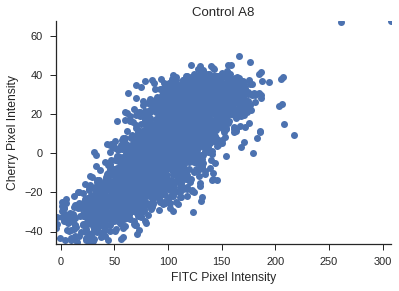

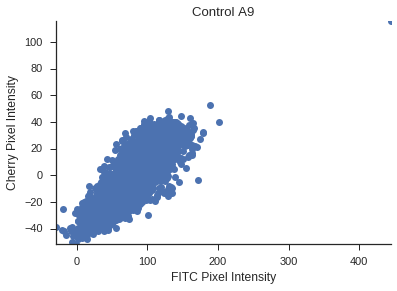

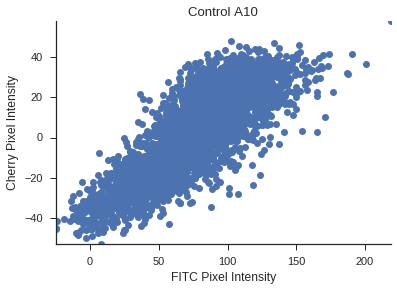

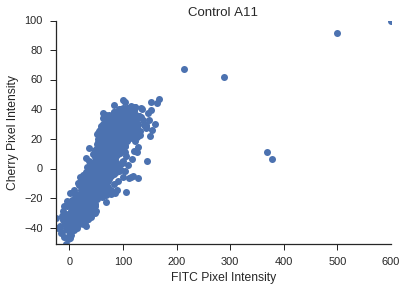

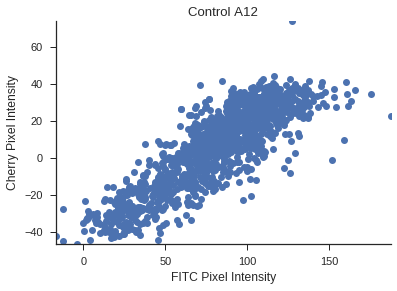

In [4]:
#Plot the data from the control plate
for well in ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']:
    plot_slip_well(mean_FITC_control, mean_cherry_control, well = well, title = 'Control ' + well)
    sns.despine()

In [5]:
# Define dictionary with conditions
carbon_source = {}
carbon_source['maltose'] = [12, 11, 10]
carbon_source['glycerol'] = [9,8,7]
carbon_source['glucose'] = [6,5,4]
carbon_source['galactose'] = [3,2,1]

phage_added = {}
phage_added['0'] = 'A'
phage_added['0.5'] = 'B'
phage_added['1'] = 'D'
phage_added['5'] = 'E'
phage_added['10'] = 'G'
phage_added['50'] = 'H'

reverse_phage_added = {}
reverse_phage_added['A'] = 0
reverse_phage_added['B'] = 0.5
reverse_phage_added['D'] = 1
reverse_phage_added['E'] = 5
reverse_phage_added['G'] = 10
reverse_phage_added['H'] = 50


In [6]:
#Print the number of cells in each well
for key in mean_FITC_control.keys():
    print key, len(mean_FITC_control[key])
    
for key in mean_FITC.keys():
    print key, len(mean_FITC[key])

A11 1133
A10 3158
A12 1266
A1 937
A3 1365
A2 890
A5 12126
A4 7211
A7 2543
A6 6396
A9 2376
A8 3091
D10 499
D11 1953
D12 1138
E11 2653
E10 1626
E12 1564
B12 2442
B10 477
B11 2788
G7 566
G6 1988
G5 1434
G4 1398
G3 1445
G2 589
G1 578
D3 394
G9 1024
G8 727
E9 2615
E8 1551
E5 2
E4 1329
E7 1546
E6 3898
E1 634
E3 600
E2 1013
D8 883
H10 2208
H11 806
H12 786
D9 1589
D2 495
G12 1643
G11 621
G10 458
H8 3484
H9 3529
H2 2996
H3 2181
H1 1270
H6 5672
H7 4007
H4 5920
H5 3018
B4 1392
B5 8080
B6 1785
B7 1088
B1 614
B2 793
B3 504
D6 1856
D7 2316
D4 1465
D5 1346
B8 512
B9 1462
D1 2


In [7]:
# Fit a KDE estimator to the no infection controls
kernels = {}
for well in ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']:
    kernels[well] = fit_kde(mean_FITC_control, mean_cherry_control, well)

In [8]:
# Compute the probability of observing each data point assuming there was no infection
p_values_dict = {}
for row in row_data:
    for col in [10,11,12]:
        well = row + str(col)
        print well
        kernel = kernels['A' + str(col)]
        p_values_dict[well] = np.array(compute_p_values(mean_FITC, mean_cherry, well, kernel))

B10
B11
B12
D10
D11
D12
E10
E11
E12
G10
G11
G12
H10
H11
H12


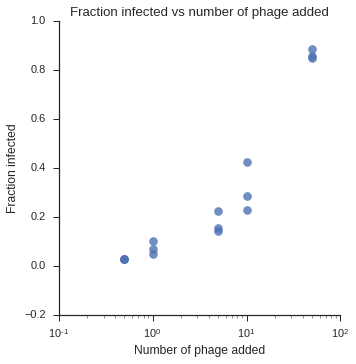

In [9]:
#Compute the fraction infected in each well and plot
conc_list = []
fraction_infected_list = []
for well in p_values_dict.keys():
    p_value = p_values_dict[well]
    fraction_infected = np.float(np.where(p_value < 0.01)[0].shape[0])/np.float(p_value.shape[0])
    conc_list += [reverse_phage_added[well[0]]]
    fraction_infected_list += [fraction_infected]

d = {'Number of phage added': conc_list, 'Fraction infected': fraction_infected_list}
dataframe = pd.DataFrame(data = d)
grid = sns.lmplot('Number of phage added', 'Fraction infected', dataframe, fit_reg = False, scatter_kws={"s": 75})
ax = grid.axes[0][0]
ax.set_title('Fraction infected vs number of phage added')
ax.set_xscale('log')



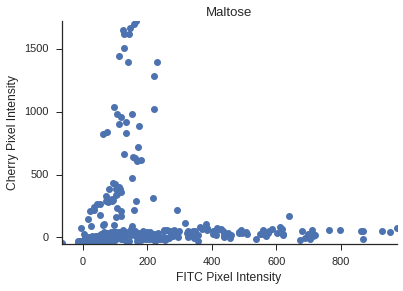

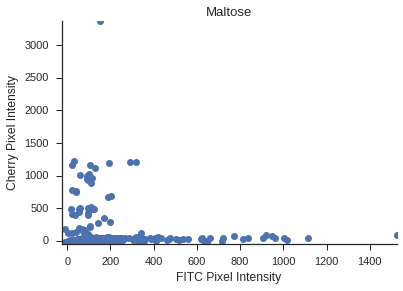

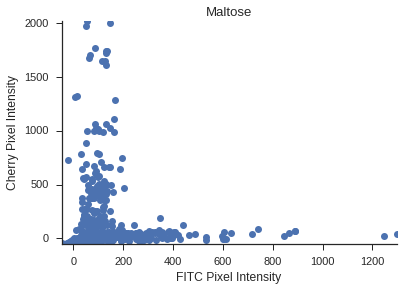

In [10]:
#Plot the scatter plot of intensities with the uninfected cells removed
for well in ['G10', 'G11', 'G12']:
    p_value = p_values_dict[well]
    infected_cells = np.where(p_value < 0.01)[0]
    plot_slip_well(mean_FITC, mean_cherry, well = well, title = str('Maltose'))
    sns.despine()

0.892857142857 25 28
0.931034482759 27 29
0.666666666667 4 6
0.913043478261 21 23
0.974358974359 38 39
0.833333333333 20 24
0.72 72 100
0.775280898876 138 178
0.780898876404 139 178
0.44387755102 87 196


/home/vanvalen/.pyenv/versions/2.7.4/envs/DeepCell/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0.685714285714 72 105
0.597826086957 55 92
0.556776556777 152 273
0.648351648352 177 273
0.287549407115 291 1012


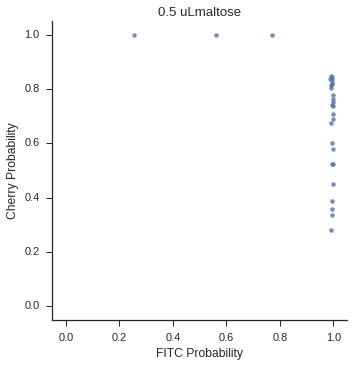

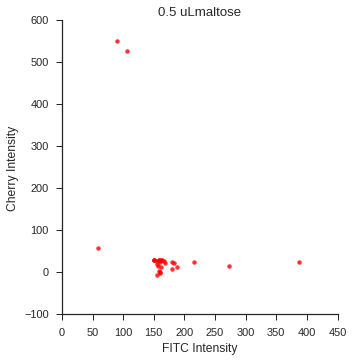

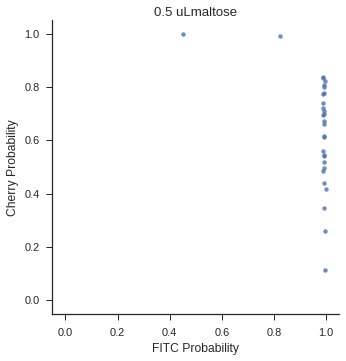

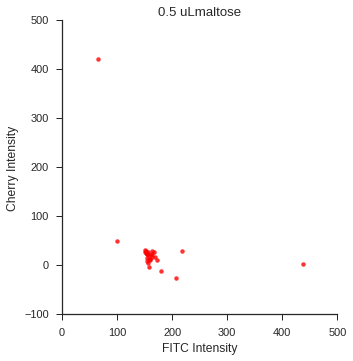

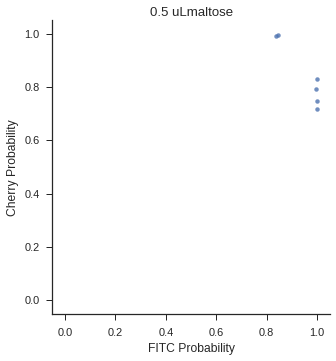

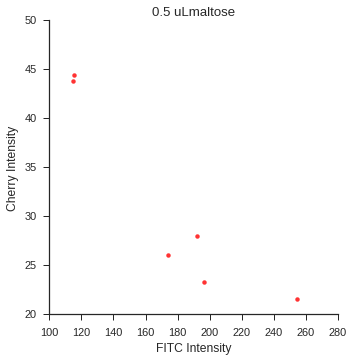

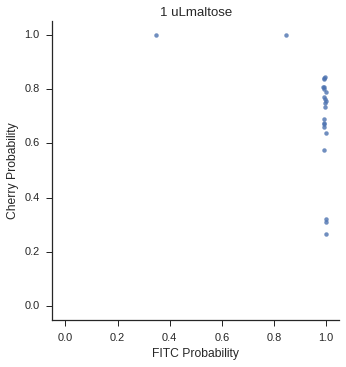

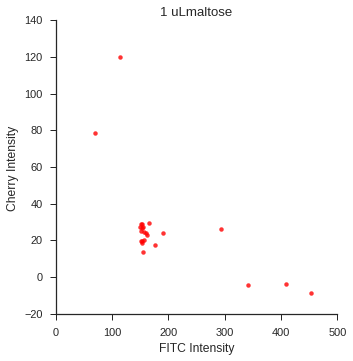

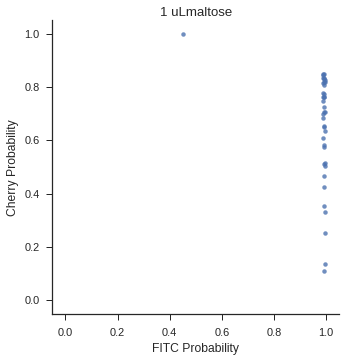

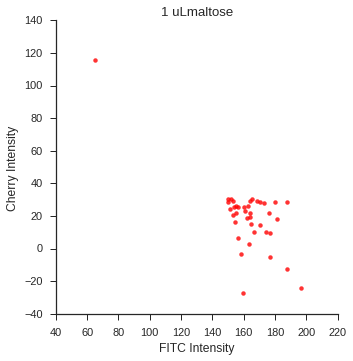

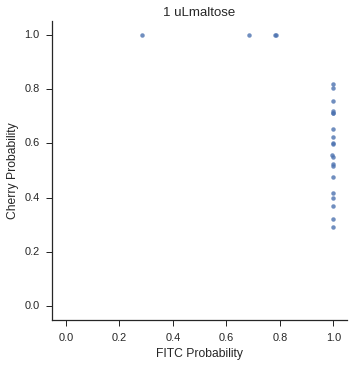

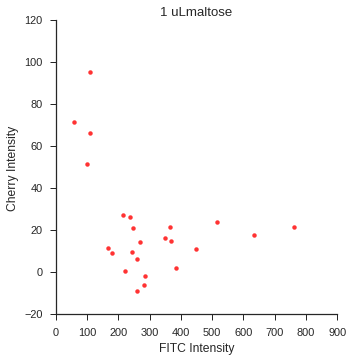

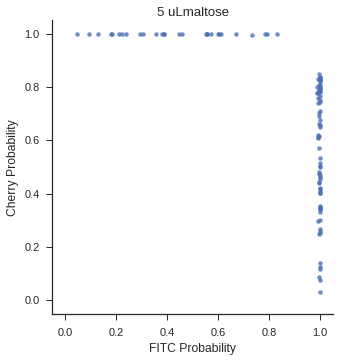

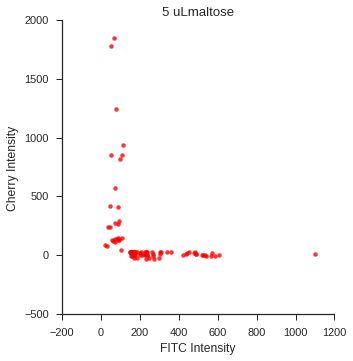

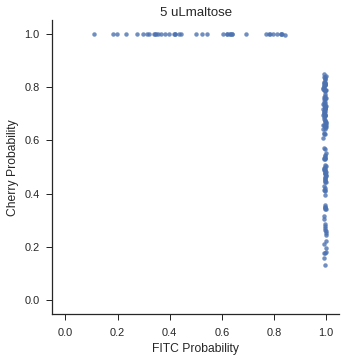

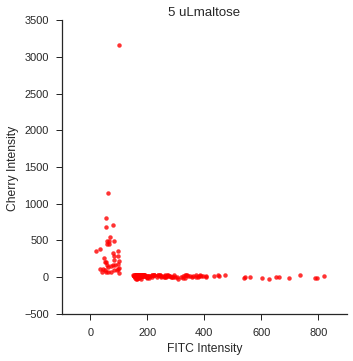

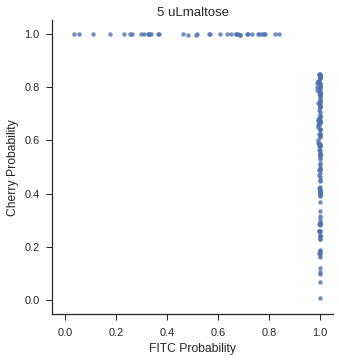

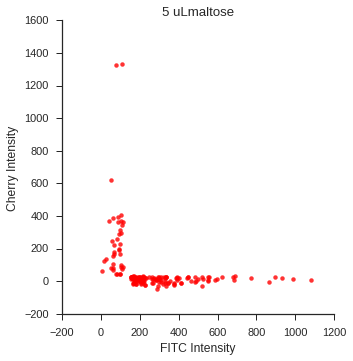

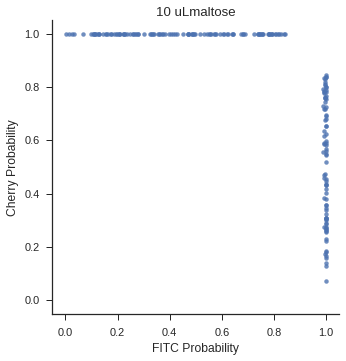

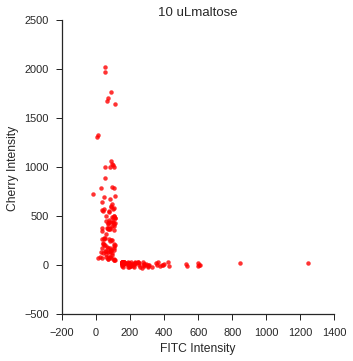

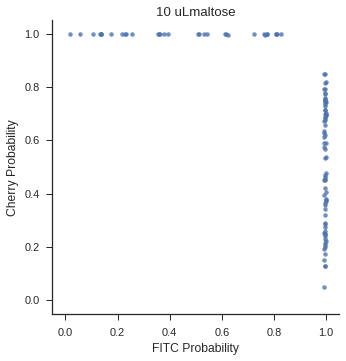

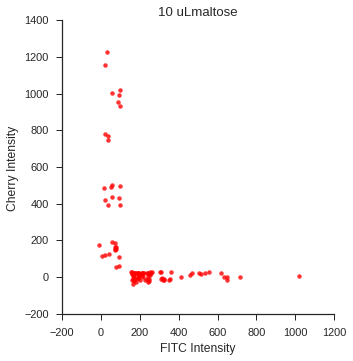

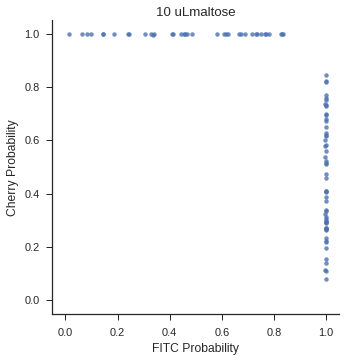

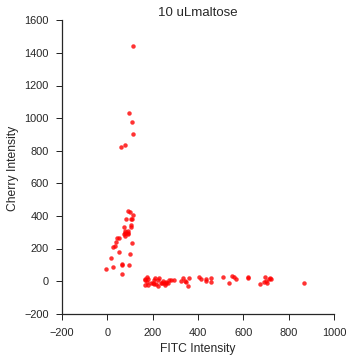

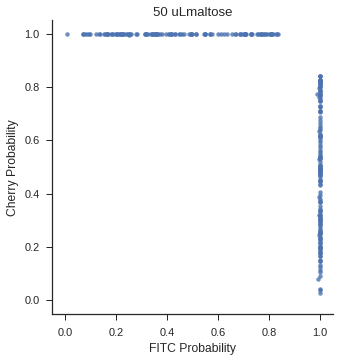

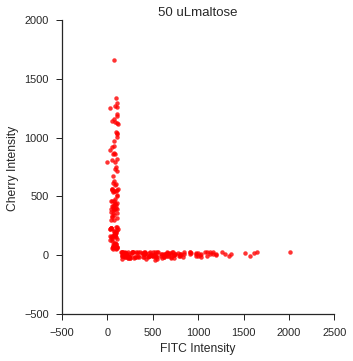

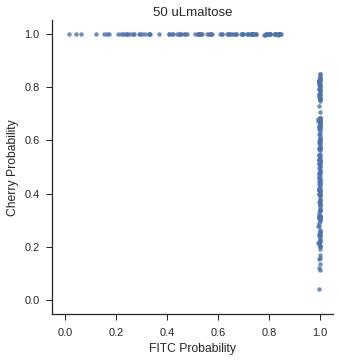

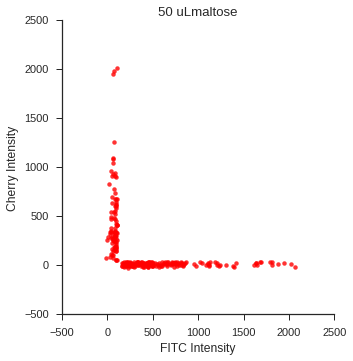

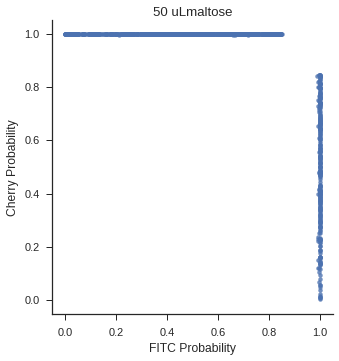

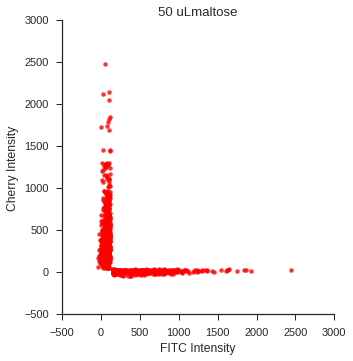

In [11]:
# Use the no phage control to construct a lysis/lysogeny classifier
carbon = 'maltose'
for row in row_data:
    for col in carbon_source[carbon]:
        
        fitc_control_array = np.array(mean_FITC_control['A' + str(col)])
        cherry_control_array = np.array(mean_cherry_control['A' + str(col)])
        kernel_fitc = scipy.stats.gaussian_kde(fitc_control_array)
        kernel_cherry = scipy.stats.gaussian_kde(cherry_control_array)

        well = row + str(col)
        p_value = p_values_dict[well]
        infected_cells = np.where(p_value < 0.01)[0]
        fitc_list = np.array(mean_FITC[well])[infected_cells]
        cherry_list = np.array(mean_cherry[well])[infected_cells]

    
        p_fitc = []
        p_cherry = []
        for fitc, cherry in zip(fitc_list, cherry_list):
            p_fitc += [1-kernel_fitc.integrate_box_1d(fitc, 1e6)]
            p_cherry += [1-kernel_cherry.integrate_box_1d(cherry, 1e6)]

        # Remove double positives
        p_fitc_new = []
        p_cherry_new = []
        fitc_list_new = []
        cherry_list_new = []
        for p_f, p_c, f, c in zip(p_fitc, p_cherry, fitc_list, cherry_list):
            if p_f < 0.85 or p_c < 0.85:
                p_fitc_new += [p_f]
                p_cherry_new += [p_c]
                fitc_list_new += [f]
                cherry_list_new += [c]

        p_fitc = p_fitc_new
        p_cherry = p_cherry_new
        fitc_list = fitc_list_new
        cherry_list = cherry_list_new

        d = {'FITC Probability': p_fitc, 'Cherry Probability': p_cherry}
        dataframe = pd.DataFrame(data = d)
        grid = sns.lmplot('FITC Probability', 'Cherry Probability', dataframe, fit_reg = False)
        ax = grid.axes[0][0]
        ax.set_title(str(reverse_phage_added[well[0]]) + ' uL' + carbon)
        ax.set_xlim([-0.05, 1.05])
        ax.set_ylim([-0.05, 1.05])

        d = {'FITC Intensity': fitc_list, 'Cherry Intensity': cherry_list}
        dataframe = pd.DataFrame(data = d)
        grid = sns.lmplot('FITC Intensity', 'Cherry Intensity', dataframe, fit_reg = False, scatter_kws = {'color': 'red'})
        ax = grid.axes[0][0]
        ax.set_title(str(reverse_phage_added[well[0]]) + ' uL' + carbon)

        counter = 0
        for p_f, p_c in zip(p_fitc, p_cherry):
            if p_f > p_c:
                counter += 1
        if len(p_fitc) > 0:
            print np.float(counter)/len(p_fitc), counter, len(p_fitc)
    

    